In [1]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 28
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Ex 10.3
### i)

In [2]:
def gaussian(x, mu, sigma_squared):
    """
    Return gauss curve on interval x with mean mu and variance sigma_squared.
    """
    bell = 1/(np.sqrt(2*np.pi*sigma_squared)) * np.exp(-((x-mu)**2)/(2*sigma_squared))
    return bell

def pi(x):
    """
    Return PDF pi on interval x.
    """
    w1 = .5
    w2 = .5
    mu21 = -4
    mu22 = 4
    sigma21 = 1
    sigma22 = 1
    
    pi = w1 * gaussian(x, mu21, sigma21) + w2 * gaussian(x, mu22, sigma22)
    return pi

def invCDF(ui, wis, xis):
    """
    1. Calculate CDF of weights wis.
    2. Take sample ui from uniform distribution and look up the closes value in CDF.
    3. Return corresponding x-value from xis.
    """
    CDF = np.cumsum(wis)
    CDFmod = CDF-ui
    mask = np.abs(CDFmod) == np.min(np.abs(CDFmod))
    return xis[mask]

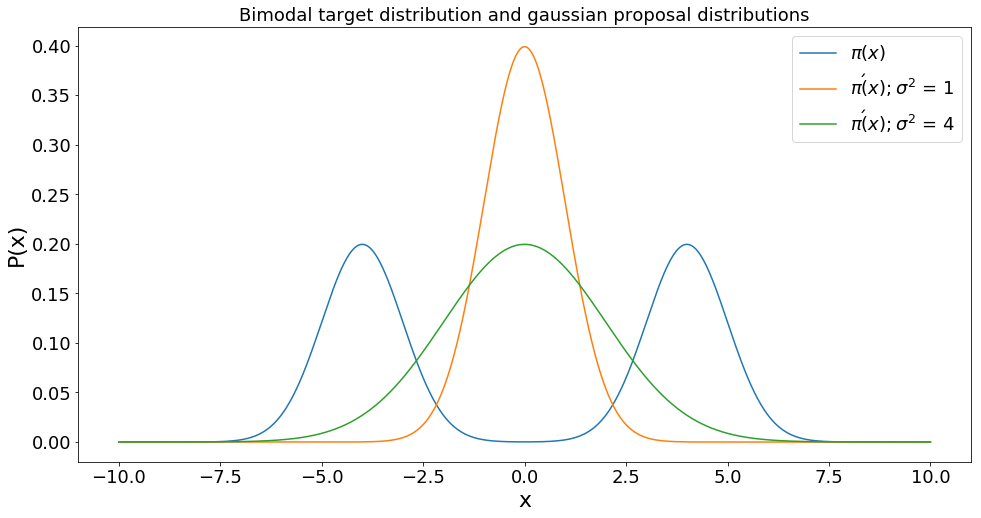

In [3]:
#Visualise distributions
x = np.linspace(-10,10,1001)
fig, ax = plt.subplots(1, figsize=(16,8))
ax.set_title('Bimodal target distribution and gaussian proposal distributions')
ax.plot(x, pi(x), label=r'$\pi(x)$')
ax.plot(x, gaussian(x,0,1), label=r'$\pi\'(x); \sigma^2$ = 1')
ax.plot(x, gaussian(x,0,4), label=r'$\pi\'(x); \sigma^2$ = 4')
ax.set_xlabel('x')
ax.set_ylabel('P(x)')
plt.legend()
plt.show()

In [4]:
# Importance sampling for sigma^2 = 1
xis = np.sort(np.random.normal(0, 1, 10000)) # Draw 10000 samples from gaussian proposal distribution
wis = (pi(xis) / gaussian(xis, 0, 1))  # Calculate weights wis
wis /= wis.sum() # Normalise weights

ui = np.random.uniform(0,1,10000) # Draw 10000 samples from uniform distribution
samples = []

for u in ui:
    samples.append(invCDF(u, wis, xis)) # Convert unifrom samples to samples from target distribution 
samples = np.array(samples)             # using the transform method.


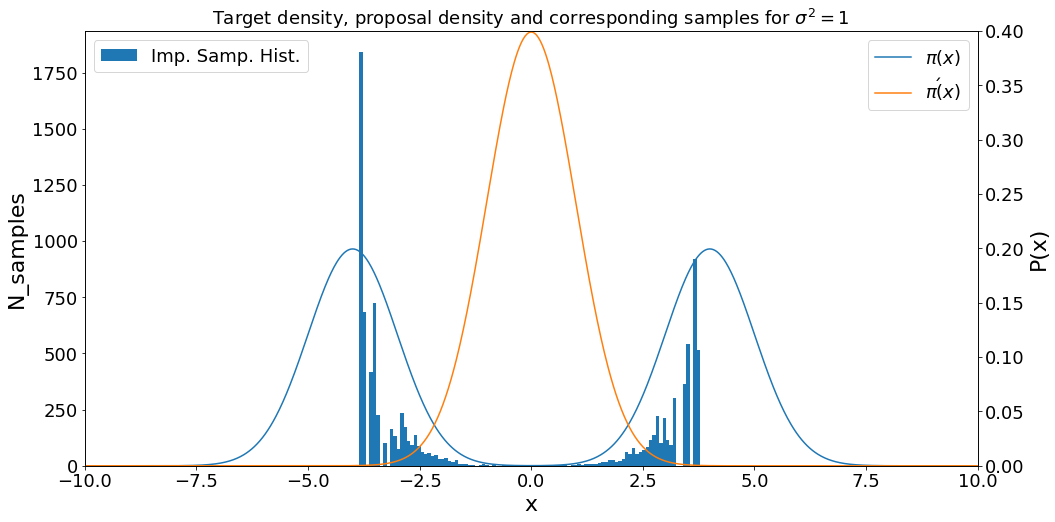

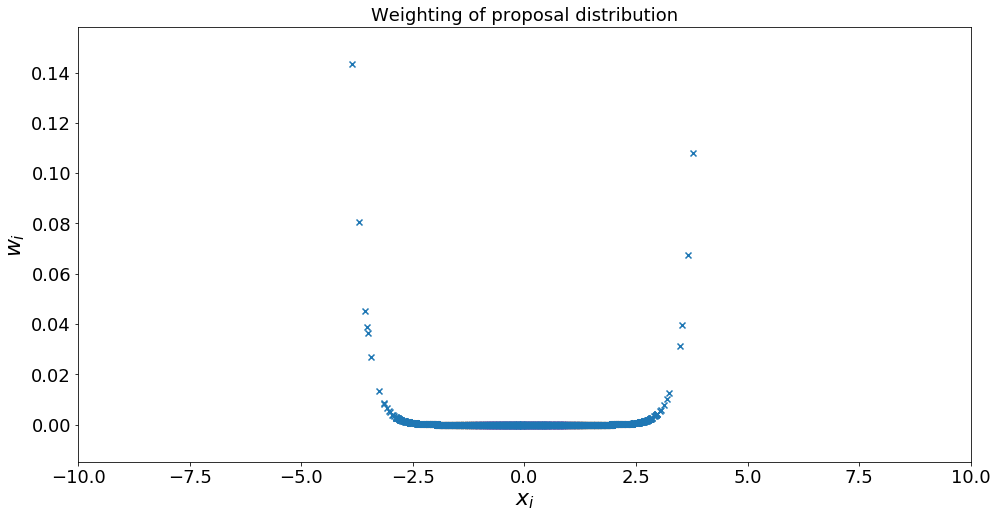

In [5]:
# Visualise results
fig, ax = plt.subplots(1,figsize=(16,8))
ax.hist(samples, bins=100, label='Imp. Samp. Hist.')
ax.set_ylabel('N_samples')
ax.set_xlabel('x')
ax.set_xlim([-10,10])
#ax.set_ylim([0,700])
ax.legend(loc='upper left')
ax.set_title('Target density, proposal density and corresponding samples for $\sigma^2=1$')

ax2 = ax.twinx()
ax2.plot(x, pi(x), label=r'$\pi(x)$')
ax2.plot(x, gaussian(x,0,1), label=r'$\pi\'(x)$')
ax2.set_ylabel('P(x)')
ax2.set_ylim([0,.4])
ax2.legend()


plt.show()

fig, ax = plt.subplots(1,figsize=(16,8))
ax.scatter(xis, wis, marker='x')
ax.set_xlabel('$x_i$')
ax.set_ylabel('$w_i$')
ax.set_xlim([-10,10])
ax.set_title('Weighting of proposal distribution')
plt.show()

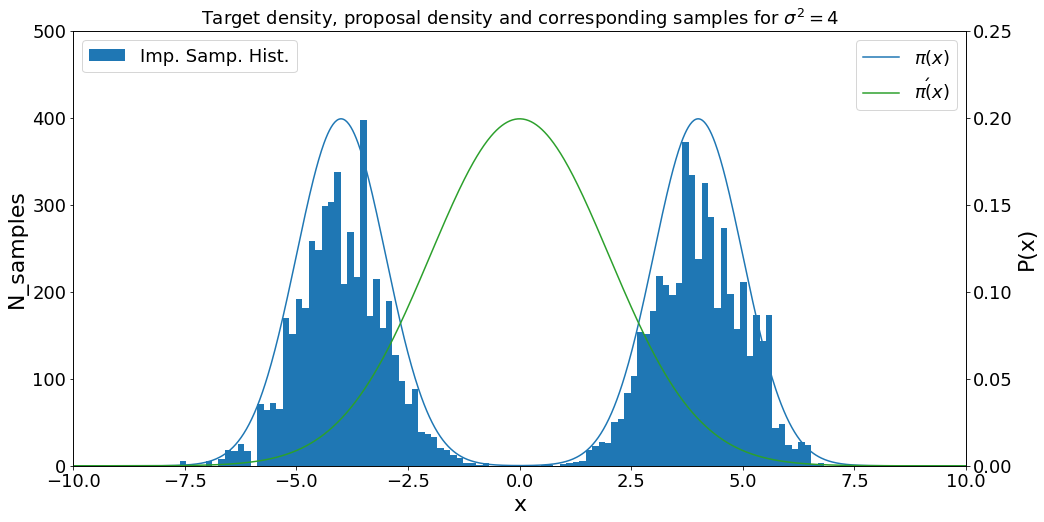

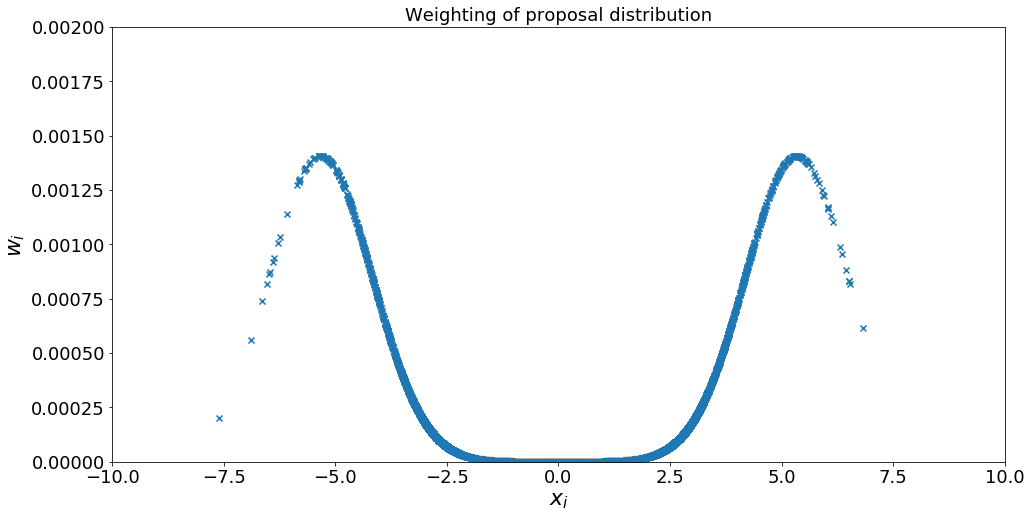

In [6]:
# Importance sampling for sigma^2 = 4
xis = np.sort(np.random.normal(0, 2, 10000)) # Draw 10000 samples from gaussian proposal distribution
wis = (pi(xis) / gaussian(xis, 0, 4)) # Calculate weights wis
wis /= wis.sum() # Normalise weights


ui = np.random.uniform(0,1,10000) # Draw 10000 samples from uniform distribution
samples = []
for u in ui:
    samples.append(invCDF(u, wis, xis)) # Convert unifrom samples to samples from target distribution 
samples = np.array(samples)             # using the transform method.


# Visualise results
fig, ax = plt.subplots(1, figsize=(16,8))
ax.hist(samples, bins=100, label='Imp. Samp. Hist.')
ax.set_ylabel('N_samples')
ax.set_xlabel('x')
ax.set_xlim([-10,10])
ax.set_ylim([0,500])

ax.legend(loc='upper left')
ax.set_title('Target density, proposal density and corresponding samples for $\sigma^2=4$')


ax2 = ax.twinx()
ax2.plot(x, pi(x), label=r'$\pi(x)$', zorder=0)
ax2.plot(x, gaussian(x,0,4), label=r'$\pi\'(x)$', c='C2')
ax2.set_ylabel('P(x)')
ax2.set_ylim([0,.25])
ax2.legend()
plt.show()

fig, ax = plt.subplots(1, figsize=(16,8))
ax.scatter(xis, wis, marker='x')
ax.set_xlabel('$x_i$')
ax.set_ylabel('$w_i$')
ax.set_xlim([-10,10])
ax.set_ylim([0, 0.002])
ax.set_title('Weighting of proposal distribution')

plt.show()

### ii)
Both choices of $\sigma^2$ would lead to good approximations of $\pi(x)$ if an infinite number of samples were drawn from $\pi'$. For finitely many samples, however, the tail of $\pi'(x) = \mathcal{N}(0,1)$ is not sampled sufficiently, therefore also the tails of $\pi(x)$ are underrepresented after the application of the importance sampling.